# Balance Scale Data Set

Data Set Information:

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.

In [40]:
#Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [41]:
#Reading the Dataset
df = pd.read_csv('balance-scale.data')
print(df.shape) #no of columns and rows in the dataset.
df.head() #Top 5 records of the dataset.

(624, 5)


,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [42]:
# Renaming the Columns for better redability:
column_labels = ['Class Name','Left-Weight','Left-Distance','Right-Weight','Right-Distance']
df.columns = column_labels
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [51]:
#checking the info of every features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      624 non-null    object
 1   Left-Weight     624 non-null    int64 
 2   Left-Distance   624 non-null    int64 
 3   Right-Weight    624 non-null    int64 
 4   Right-Distance  624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [43]:
#checking the datatypes:
df.dtypes

Class Name        object
Left-Weight        int64
Left-Distance      int64
Right-Weight       int64
Right-Distance     int64
dtype: object

In [44]:
#Checking the value count of target variable:
df['Class Name'].value_counts()

L    288
R    288
B     48
Name: Class Name, dtype: int64

Class Name        0
Left-Weight       0
Left-Distance     0
Right-Weight      0
Right-Distance    0
dtype: int64


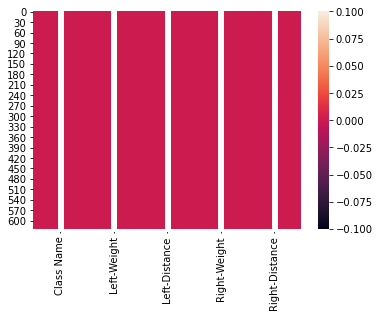

In [45]:
# Checking For null and missing values:
print(df.isnull().sum())
sns.heatmap(df.isnull(),annot=True)

In [46]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,624.000000,624.000000,624.000000,624.000000
mean,3.003205,3.003205,3.003205,3.003205
std,1.414210,1.414210,1.414210,1.414210
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [47]:
#Exploratory Data Analysis
#Univarite Analysis
#Multivariate Analysis
#Bivariate Analysis

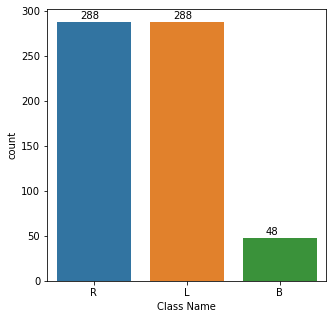

In [48]:
#Univariate Analysis checking count of Target Variable:
plt.figure(figsize=(5,5))
ax = sns.countplot(df['Class Name'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

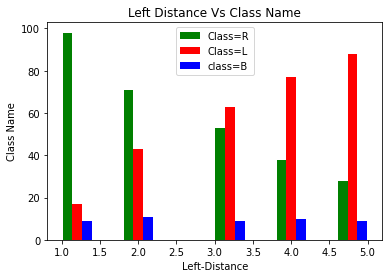

In [50]:
#Bivariate Analysis:
left_distance_R = df[df['Class Name']=='R']['Left-Distance']
left_distance_L = df[df['Class Name']=='L']['Left-Distance']
left_distance_B = df[df['Class Name']=='B']['Left-Distance']
plt.xlabel("Left-Distance")
plt.ylabel("Class Name")
plt.title("Left Distance Vs Class Name")
plt.hist([left_distance_R, left_distance_L, left_distance_B], rwidth=0.95, color=['green','red','blue'],label=['Class=R','Class=L','class=B'])
plt.legend()

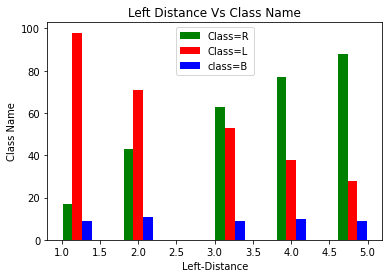

In [11]:
#Bivariate Analysis:
right_distance_R = df[df['Class Name']=='R']['Right-Distance']
right_distance_L = df[df['Class Name']=='L']['Right-Distance']
right_distance_B = df[df['Class Name']=='B']['Right-Distance']
plt.xlabel("Left-Distance")
plt.ylabel("Class Name")
plt.title("Left Distance Vs Class Name")
plt.hist([right_distance_R, right_distance_L, right_distance_B], rwidth=0.95, color=['green','red','blue'],label=['Class=R','Class=L','class=B'])
plt.legend()

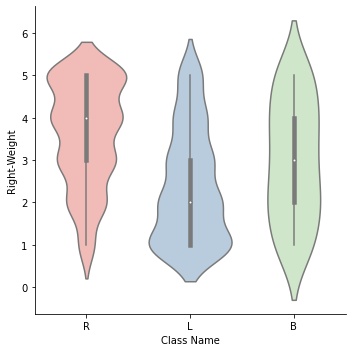

In [12]:
#Lets check the impact of right-weight on ClassName:
g = sns.factorplot(x="Class Name", y = "Right-Weight",data = df, kind="violin", palette = "Pastel1")

In [13]:
#Checking for skewness:
#whether the features are right or left skewed
#for right and left skewed we can use logarthim transformation
#if the skewness value is greater than o.55 then the features are skewed

In [14]:
df.skew()

Left-Weight      -0.002266
Left-Distance    -0.002266
Right-Weight     -0.002266
Right-Distance   -0.002266
dtype: float64

In [ ]:
#No skewness is present.

In [16]:
#Using Label Encoder to covert Target variable:
#Ordinal data --> data are in order --> LabelEncoder is used in this case.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Class Name'] 
for col in columns:
    df[col] = le.fit_transform(df[col])

In [17]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

In [18]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print(df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(624, 5)
(624, 5)


In [ ]:
#No outliers are present in dataset

In [ ]:
#Checking for the co-relation:
#show how the different features are corelated to each other 
#Their strength of relationship
#Their influence on target variable

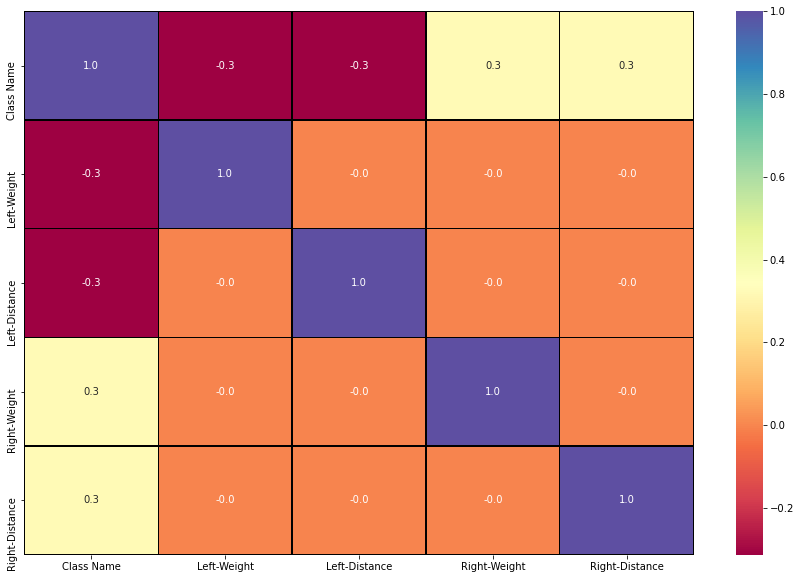

In [37]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_final.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [20]:
#selecting Input and output variable
X = df_final.drop('Class Name',axis=1)
y = df_final['Class Name']
print(X.shape)
print(y.shape)

(624, 4)
(624,)


In [21]:
#Selecting Training and Testing Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
#Using StandardScaler to normalize the data and bring it to standard normal distribution:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Implementing Algorithim for Prediction Process:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    print("Accuracy Score of model is:",model.score(X_test,y_test))
    score = cross_val_score(model,X,y,cv=5)
    print("Cross validation is",np.mean(score)*100)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy Score of model is: 0.864
Cross validation is 85.2567741935484


In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.824
Cross validation is 60.40387096774194


In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.84
Cross validation is 72.27612903225807


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.856
Cross validation is 66.1716129032258


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.92
Cross validation is 64.90064516129031


In [31]:
#Accuracy Score is maximum with GradientBoostingClassifier so lets implement it.

accuracy_score: 0.92
[[ 1  5  3]
 [ 0 57  0]
 [ 1  1 57]]
              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.90      1.00      0.95        57
           2       0.95      0.97      0.96        59

    accuracy                           0.92       125
   macro avg       0.78      0.69      0.70       125
weighted avg       0.90      0.92      0.90       125



Text(0.5, 15.0, 'Predicted label')

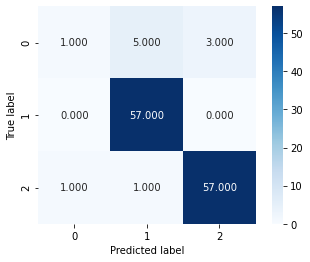

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)
y_predict= classifier.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [35]:
#saving the best Model for future analysis:
import joblib
joblib.dump(classifier,'classifier.obj')
classifier_from_joblib = joblib.load('classifier.obj')
classifier_from_joblib.predict(X_test)

array([2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2])